In [7]:
import sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def fourier(time,array):

        fft = np.fft.fft(array)

        Npts = len(array)
        spacing_array = time[::-1][:-1][::-1] - time[:-1]

        if np.mean(spacing_array) - spacing_array[0] > 1.e-16:
                print "time axis not equally separated. cannot compute fft"
                sys.exit()
        spacing = spacing_array[0]

        freq = np.fft.fftfreq(Npts, spacing)
        freq = freq*360.*3600. # convert frequency from cycles/years to arcsecs/years

        return freq,fft

In [8]:
# load data that has been passed through a Hanning window, then filtered
# this is with setting the zeroth frequency to FT [0] before filteri
filename = "mercury_free_params_zeroth.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
zeta = data[:,3]+1j*data[:,4]

In [9]:
ecc_m_filt = np.absolute(z)
inc_m_filt = np.absolute(zeta)
pomega_m_filt = np.angle(z)
Omega_m_filt = np.angle(zeta)

original values of the orbital parameters 

In [10]:
filename = "mercury_orbparams.txt"
data = np.loadtxt(filename)
time_orig = data[:,0]
# find the index to which the original time corresponds to the filtered time
# so that when comparing both arrays have same length and correspond to the same time
idx = np.logical_and(time_orig >= time[0], time_orig <= time[-1])
ecc = data[:,1][idx]
inc = data[:,2][idx]
pomega = data[:,3][idx]
Omega = data[:,4][idx]

In [11]:
filename = "venus_free_params_zeroth.txt"
data = np.loadtxt(filename)
time = data[:,0]
zeta = data[:,1] + 1j*data[:,2]
Omega_v_filt = np.angle(zeta)
filename = "jupiter_free_params_zeroth.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
pomega_j_filt = np.angle(z)

In [12]:
angle_1m1 = (pomega_m_filt - pomega_j_filt) - (Omega_m_filt - Omega_v_filt)
angle_1p1 = (pomega_m_filt - pomega_j_filt) + (Omega_m_filt - Omega_v_filt)
angle_2m1 = 2.0*(pomega_m_filt - pomega_j_filt) - (Omega_m_filt - Omega_v_filt)
angle_3m2 = 3.0*(pomega_m_filt - pomega_j_filt) - 2.0*(Omega_m_filt - Omega_v_filt)
angle_4m3 = 4.0*(pomega_m_filt - pomega_j_filt) - 3.0*(Omega_m_filt - Omega_v_filt)
angle_5m4 = 5.0*(pomega_m_filt - pomega_j_filt) - 4.0*(Omega_m_filt - Omega_v_filt)

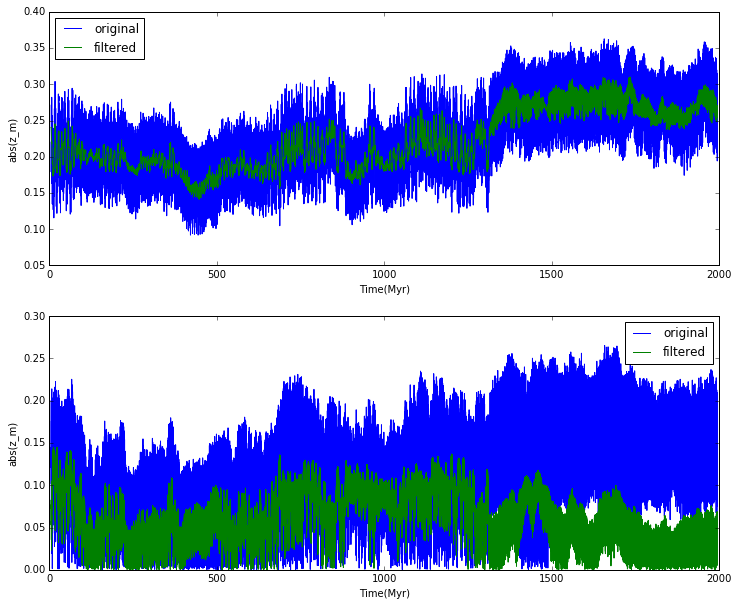

In [13]:
plt.clf()
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("abs(z_m)")
plt.plot(time/1.e6,ecc,label="original")
plt.plot(time/1.e6,ecc_m_filt,label="filtered")
plt.legend(loc="best")
plt.subplot(2,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("abs(z_m)")
plt.plot(time/1.e6,inc,label="original")
plt.plot(time/1.e6,inc_m_filt,label="filtered")
plt.legend(loc="best")

Looking at angle combinations for the entire 2 Gyr

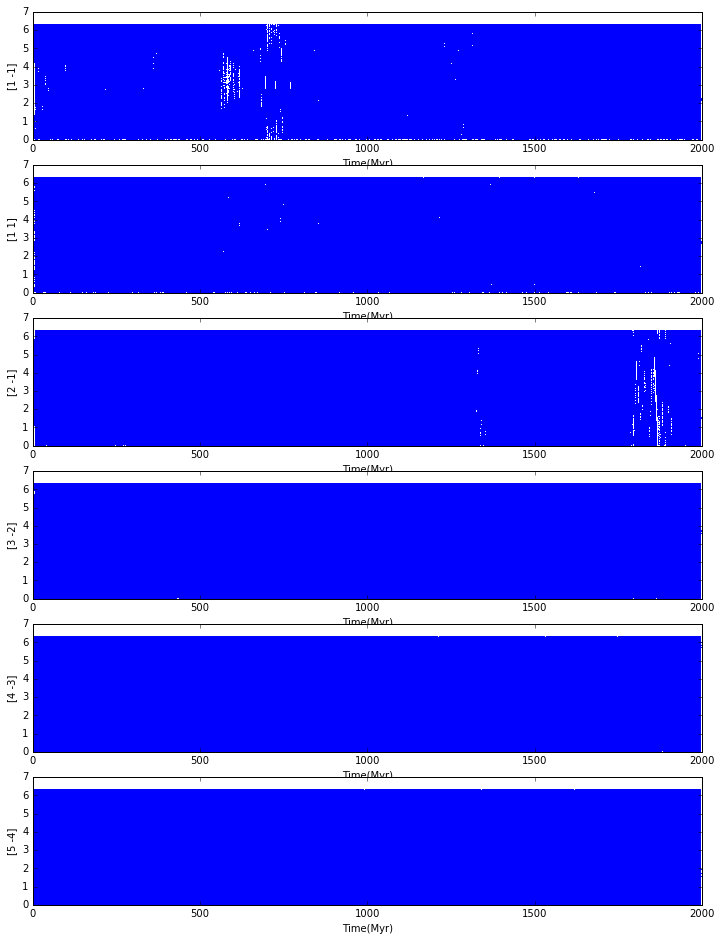

In [14]:
plt.clf()
plt.figure(figsize=(12,16))
plt.subplot(6,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time/1.e6,angle_1m1%(2.*np.pi),',')
plt.subplot(6,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
plt.plot(time/1.e6,angle_1p1%(2.*np.pi),',')
plt.subplot(6,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 -1]")
plt.plot(time/1.e6,angle_2m1%(2.*np.pi),',')
plt.subplot(6,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 -2]")
plt.plot(time/1.e6,angle_3m2%(2.*np.pi),',')
plt.subplot(6,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 -3]")
plt.plot(time/1.e6,angle_4m3%(2.*np.pi),',')
plt.subplot(6,1,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 -4]")
plt.plot(time/1.e6,angle_5m4%(2.*np.pi),',')

Let's see the same analysis but with when the filtering was done with setting the zeroth frequency to the average of the pre-filtered signal 

In [17]:
filename = "mercury_free_params_mean.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
zeta = data[:,3]+1j*data[:,4]

ecc_m_filt = np.absolute(z)
inc_m_filt = np.absolute(zeta)
pomega_m_filt = np.angle(z)
Omega_m_filt = np.angle(zeta)

filename = "venus_free_params_mean.txt"
data = np.loadtxt(filename)
time = data[:,0]
zeta = data[:,1] + 1j*data[:,2]
Omega_v_filt = np.angle(zeta)
filename = "jupiter_free_params_mean.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
pomega_j_filt = np.angle(z)

angle_1m1 = (pomega_m_filt - pomega_j_filt) - (Omega_m_filt - Omega_v_filt)
angle_1p1 = (pomega_m_filt - pomega_j_filt) + (Omega_m_filt - Omega_v_filt)
angle_2m1 = 2.0*(pomega_m_filt - pomega_j_filt) - (Omega_m_filt - Omega_v_filt)
angle_3m2 = 3.0*(pomega_m_filt - pomega_j_filt) - 2.0*(Omega_m_filt - Omega_v_filt)
angle_4m3 = 4.0*(pomega_m_filt - pomega_j_filt) - 3.0*(Omega_m_filt - Omega_v_filt)
angle_5m4 = 5.0*(pomega_m_filt - pomega_j_filt) - 4.0*(Omega_m_filt - Omega_v_filt)

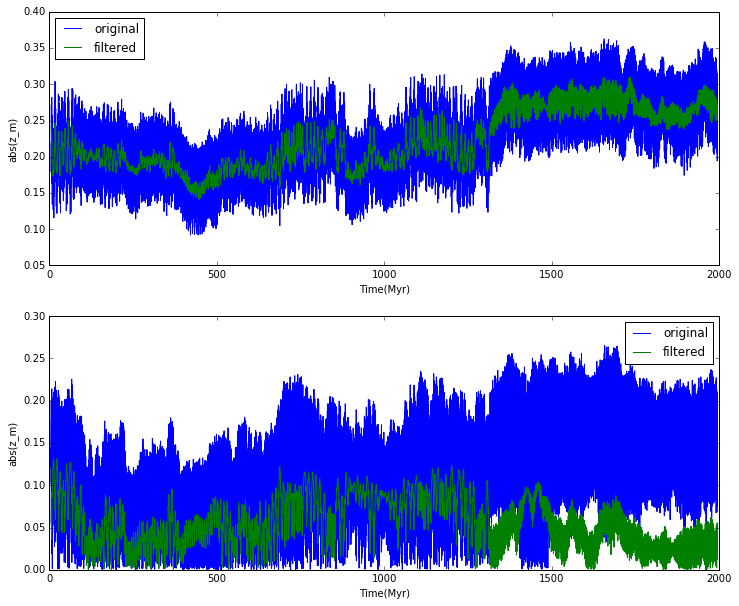

In [18]:
plt.clf()
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("abs(z_m)")
plt.plot(time/1.e6,ecc,label="original")
plt.plot(time/1.e6,ecc_m_filt,label="filtered")
plt.legend(loc="best")
plt.subplot(2,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("abs(z_m)")
plt.plot(time/1.e6,inc,label="original")
plt.plot(time/1.e6,inc_m_filt,label="filtered")
plt.legend(loc="best")

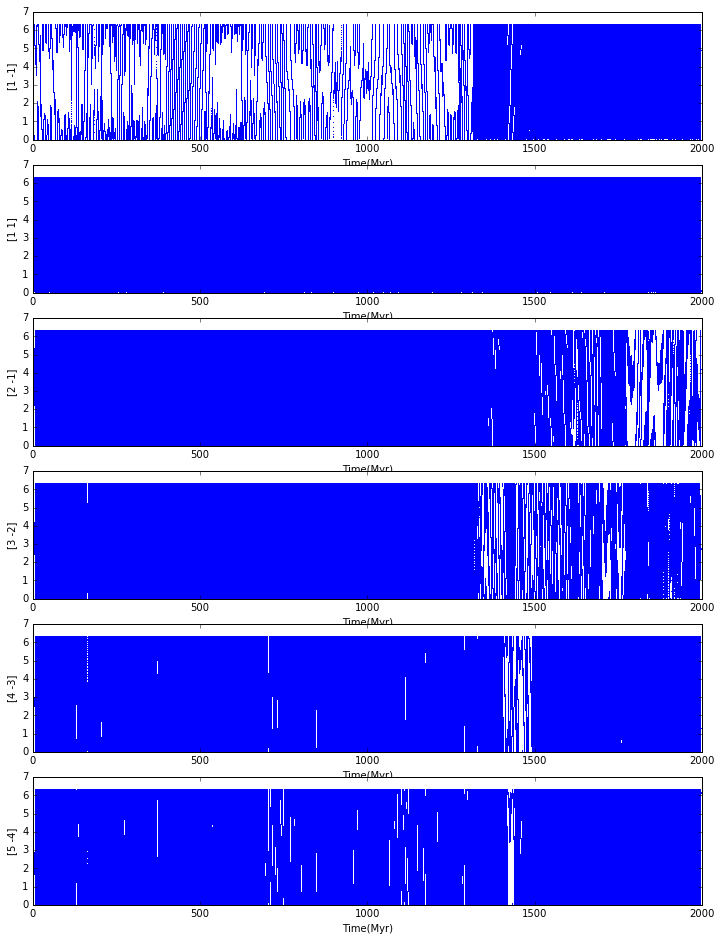

In [22]:
plt.clf()
plt.figure(figsize=(12,16))
plt.subplot(6,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time/1.e6,angle_1m1%(2.*np.pi),',')
plt.subplot(6,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
plt.plot(time/1.e6,angle_1p1%(2.*np.pi),',')
plt.subplot(6,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 -1]")
plt.plot(time/1.e6,angle_2m1%(2.*np.pi),',')
plt.subplot(6,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 -2]")
plt.plot(time/1.e6,angle_3m2%(2.*np.pi),',')
plt.subplot(6,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 -3]")
plt.plot(time/1.e6,angle_4m3%(2.*np.pi),',')
plt.subplot(6,1,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 -4]")
plt.plot(time/1.e6,angle_5m4%(2.*np.pi),',')

Zooming at 350-600 Myr where a long period of libration occurs at [1 -1]

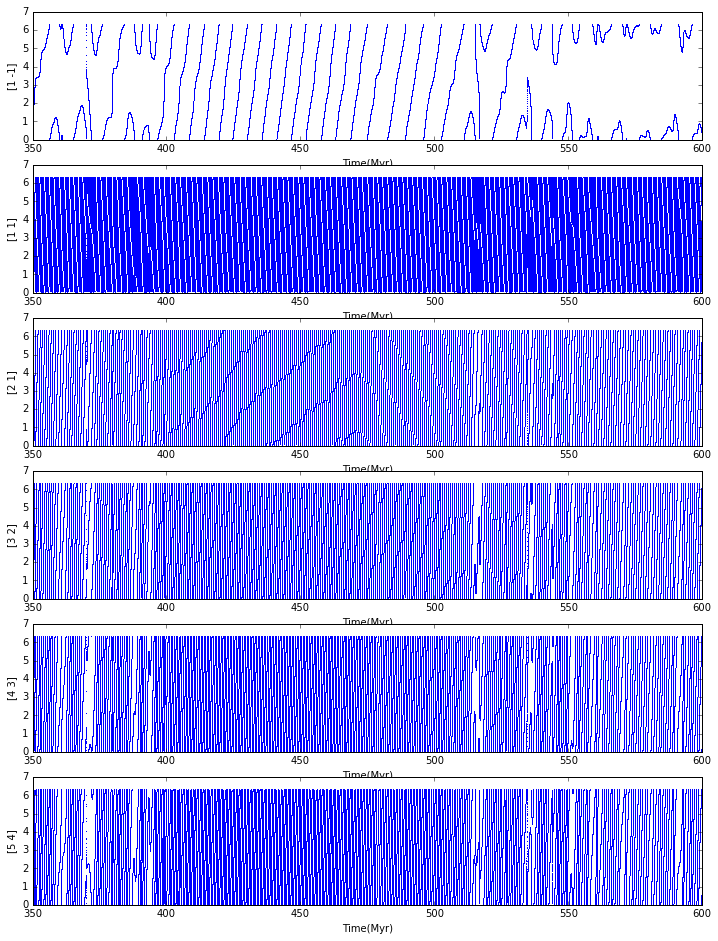

In [24]:
idx = np.logical_and(time>350.e6,time<600.e6)

plt.clf()
plt.figure(figsize=(12,16))

plt.subplot(6,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time[idx][::1]/1.e6,angle_1m1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
plt.plot(time[idx][::1]/1.e6,angle_1p1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 1]")
plt.plot(time[idx][::1]/1.e6,angle_2m1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 2]")
plt.plot(time[idx][::1]/1.e6,angle_3m2[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 3]")
plt.plot(time[idx][::1]/1.e6,angle_4m3[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 4]")
plt.plot(time[idx][::1]/1.e6,angle_5m4[idx][::1]%(2.*np.pi),',')

Zooming around  1260-1400 Myr

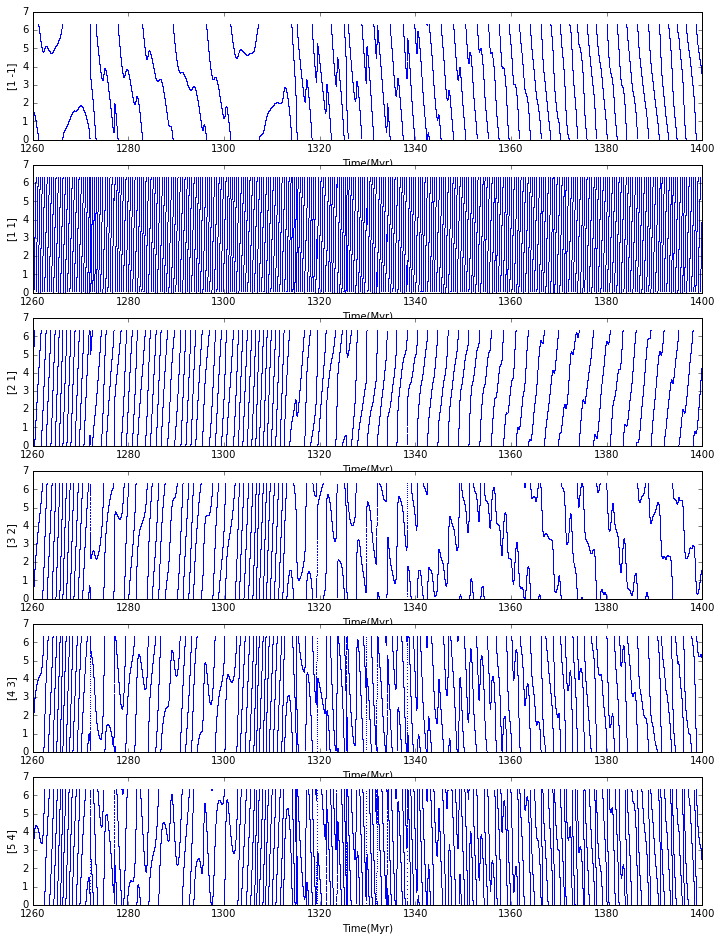

In [29]:
idx = np.logical_and(time>1260.e6,time<1400.e6)

plt.clf()
plt.figure(figsize=(12,16))

plt.subplot(6,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time[idx][::1]/1.e6,angle_1m1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
plt.plot(time[idx][::1]/1.e6,angle_1p1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 1]")
plt.plot(time[idx][::1]/1.e6,angle_2m1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 2]")
plt.plot(time[idx][::1]/1.e6,angle_3m2[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 3]")
plt.plot(time[idx][::1]/1.e6,angle_4m3[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 4]")
plt.plot(time[idx][::1]/1.e6,angle_5m4[idx][::1]%(2.*np.pi),',')

Zooming around 1600 - 1800 Myr

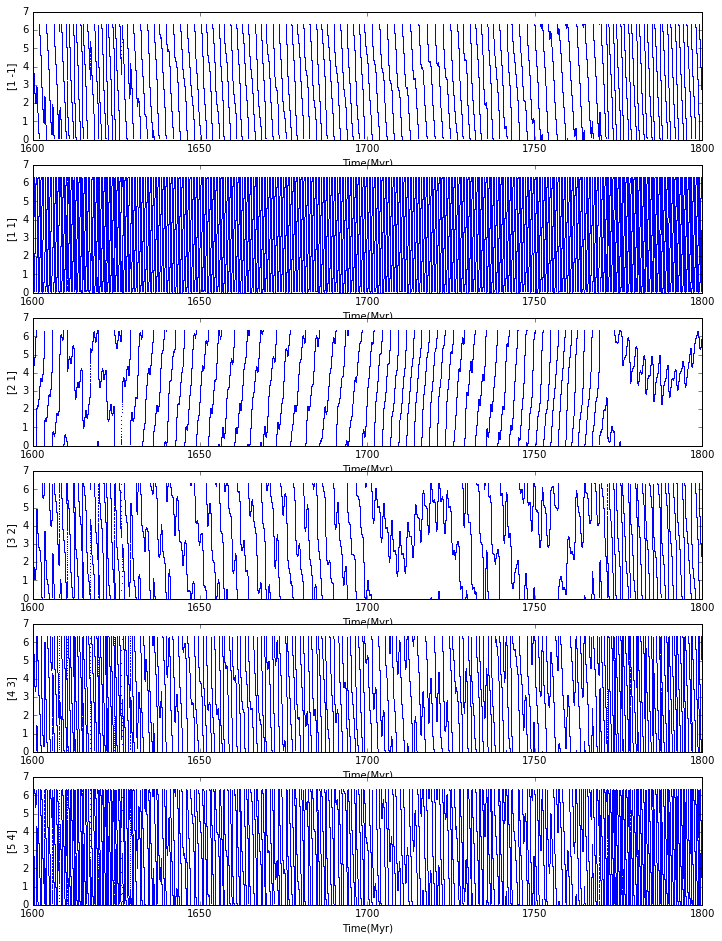

In [30]:
idx = np.logical_and(time>1600.e6,time<1800.e6)

plt.clf()
plt.figure(figsize=(12,16))

plt.subplot(6,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time[idx][::1]/1.e6,angle_1m1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
plt.plot(time[idx][::1]/1.e6,angle_1p1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 1]")
plt.plot(time[idx][::1]/1.e6,angle_2m1[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 2]")
plt.plot(time[idx][::1]/1.e6,angle_3m2[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 3]")
plt.plot(time[idx][::1]/1.e6,angle_4m3[idx][::1]%(2.*np.pi),',')
plt.subplot(6,1,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 4]")
plt.plot(time[idx][::1]/1.e6,angle_5m4[idx][::1]%(2.*np.pi),',')